# Sortino Ratio Computation for the Metal Sector

## Metal Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'NAZARA.NS','JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("metal_1.csv")

In [2]:
df = pd.read_csv("metal.csv", index_col=0)

In [3]:
df.head()

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS     VEDL.NS  \
Date                                                                          
2017-01-02    347.556702   154.374634   147.348465    41.122292  134.315994   
2017-01-03    344.608765   154.374634   148.272614    40.908527  133.525726   
2017-01-04    346.445923   154.423203   147.005875    41.576534  131.793198   
2017-01-05    358.280334   157.435883   158.366013    42.297981  138.388931   
2017-01-06    358.493927   156.221100   157.960297    42.030777  140.182266   

            COALINDIA.NS    SAIL.NS  JINDALSTEL.NS    NMDC.NS  APLAPOLLO.NS  
Date                                                                         
2017-01-02    194.032700  46.615391      70.349998  91.833458     89.555534  
2017-01-03    197.427734  47.676926      70.400002  93.301933     90.086227  
2017-01-04    197.977402  46.661541      71.199997  96.167259     91.483551  
2017-01-05    199.367737  47.953850      75.500000  96.668678     91.717255  
2017-01-06    198.009720  48.000008      73.550003  97.385002     92.807854

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2017-01-03     -0.008518     0.000000     0.006252    -0.005212 -0.005901   
2017-01-04      0.005317     0.000315    -0.008580     0.016197 -0.013060   
2017-01-05      0.033589     0.019321     0.074436     0.017203  0.048834   
2017-01-06      0.000596    -0.007746    -0.002565    -0.006337  0.012875   
2017-01-09      0.005823    -0.017255     0.004840     0.001271  0.008421   
...                  ...          ...          ...          ...       ...   
2021-12-27      0.005677    -0.013382     0.002683     0.018668 -0.015739   
2021-12-28      0.005024     0.011746     0.006563     0.011950  0.012843   
2021-12-29     -0.009984    -0.008549    -0.002208    -0.018997 -0.015638   
2021-12-30     -0.013756    -0.010178    -0.015519    -0.012682 -0.018284   
2021-12-31      0.009447     0.056003     0.015595     0.007663  0.023426   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2017-01-03      0.017346  0.022517       0.000711  0.015864      0.005908  
2017-01-04      0.002780 -0.021527       0.011299  0.030248      0.015392  
2017-01-05      0.006998  0.027319       0.058640  0.005200      0.002551  
2017-01-06     -0.006835  0.000962      -0.026167  0.007383      0.011821  
2017-01-09     -0.020456  0.006708       0.009472  0.001103     -0.011290  
...                  ...       ...            ...       ...           ...  
2021-12-27      0.001028 -0.003222      -0.008624 -0.000754     -0.017303  
2021-12-28      0.018990  0.003222       0.005758  0.001508      0.009089  
2021-12-29     -0.014209 -0.022306      -0.018569 -0.009845     -0.003505  
2021-12-30     -0.003755 -0.011818      -0.016215  0.000000      0.001003  
2021-12-31     -0.001026  0.019308       0.019135  0.014356      0.002053  

[1235 rows x 10 columns]

In [5]:
assets = ['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS']
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 10)

In [7]:
df.head()

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2017-01-03     -0.008518     0.000000     0.006252    -0.005212 -0.005901   
2017-01-04      0.005317     0.000315    -0.008580     0.016197 -0.013060   
2017-01-05      0.033589     0.019321     0.074436     0.017203  0.048834   
2017-01-06      0.000596    -0.007746    -0.002565    -0.006337  0.012875   
2017-01-09      0.005823    -0.017255     0.004840     0.001271  0.008421   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2017-01-03      0.017346  0.022517       0.000711  0.015864      0.005908  
2017-01-04      0.002780 -0.021527       0.011299  0.030248      0.015392  
2017-01-05      0.006998  0.027319       0.058640  0.005200      0.002551  
2017-01-06     -0.006835  0.000962      -0.026167  0.007383      0.011821  
2017-01-09     -0.020456  0.006708       0.009472  0.001103     -0.011290

In [8]:
df_training = df[0:987]
df_training.columns

Index(['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
       'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 10)

In [10]:
df_training.tail()

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2020-12-24      0.001447     0.003170    -0.001637     0.021447  0.079199   
2020-12-28      0.016495     0.012373     0.054074     0.035670  0.003677   
2020-12-29     -0.000712    -0.018087    -0.012494    -0.003367 -0.020708   
2020-12-30      0.012965     0.007611     0.011200    -0.010377  0.012106   
2020-12-31      0.004984     0.013182     0.002845    -0.009547 -0.004019   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2020-12-24      0.008846  0.020118      -0.011696  0.015111      0.010303  
2020-12-28      0.010223  0.059599       0.030017  0.022679      0.060918  
2020-12-29     -0.018699  0.008564      -0.029439 -0.018717      0.013326  
2020-12-30      0.003694  0.078252       0.024937  0.018285      0.018973  
2020-12-31     -0.001107  0.060498       0.001878 -0.012590      0.055474

In [11]:
df_test= df[987:]
df_test.head()

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2021-01-01     -0.000855    -0.009188     0.006436     0.023901 -0.006215   
2021-01-04      0.074730     0.064774     0.033807     0.006798  0.059597   
2021-01-05     -0.018129    -0.015854    -0.019666    -0.000202 -0.007369   
2021-01-06      0.004764     0.034361     0.016187    -0.007104  0.064723   
2021-01-07      0.055467     0.052084     0.009169     0.053928  0.028433   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2021-01-01     -0.000739  0.005384       0.013791  0.016465     -0.026625  
2021-01-04      0.013940  0.062439       0.062941  0.050691      0.035701  
2021-01-05     -0.015419 -0.016529      -0.010658 -0.011917     -0.013104  
2021-01-06     -0.000370 -0.023347      -0.001582  0.018838      0.013777  
2021-01-07      0.010309  0.023347       0.047415  0.037425      0.025960

In [12]:
df_test.shape

(248, 10)

In [26]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [27]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.046312     0.069950   0.059316             0.847981  0.376149   
1     0.048271     0.080448   0.069579             0.864901  0.351424   
2     0.052283     0.078312   0.070414             0.899153  0.412240   
3     0.040005     0.074686   0.069398             0.929202  0.267852   
4     0.033926     0.060760   0.056459             0.929220  0.229205   
...        ...          ...        ...                  ...       ...   
9995  0.070112     0.090434   0.078507             0.868116  0.554133   
9996  0.049447     0.079261   0.069340             0.874838  0.371522   
9997  0.052148     0.074351   0.066111             0.889173  0.432383   
9998  0.034465     0.073873   0.066974             0.906600  0.195810   
9999  0.065611     0.093545   0.078837             0.842773  0.487585   

      TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
0         0.002206     0.125062     0.132532     0.053145  0.145598   
1         0.015956     0.175271     0.108852     0.076643  0.168691   
2         0.158425     0.070985     0.084145     0.140922  0.113288   
3         0.150716     0.133713     0.009253     0.146746  0.103938   
4         0.132918     0.094922     0.013167     0.169588  0.013658   
...            ...          ...          ...          ...       ...   
9995      0.156316     0.006142     0.189138     0.151295  0.085782   
9996      0.076198     0.140763     0.091829     0.083117  0.112307   
9997      0.144226     0.050309     0.102033     0.168455  0.048514   
9998      0.050176     0.203562     0.017211     0.059181  0.194672   
9999      0.021182     0.133343     0.196648     0.216154  0.059039   

      COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
0         0.096709  0.148903       0.101540  0.105144      0.089160  
1         0.034043  0.171119       0.078575  0.022259      0.148591  
2         0.089109  0.154096       0.086285  0.076232      0.026511  
3         0.023707  0.085523       0.063679  0.160384      0.122341  
4         0.025892  0.292516       0.018414  0.041165      0.197761  
...            ...       ...            ...       ...           ...  
9995      0.037492  0.072194       0.084048  0.153776      0.063816  
9996      0.181048  0.124347       0.025550  0.122385      0.042457  
9997      0.150801  0.152719       0.141493  0.009536      0.031915  
9998      0.075891  0.194083       0.017457  0.083350      0.104417  
9999      0.082980  0.013980       0.170722  0.028917      0.077035  

[10000 rows x 15 columns]

In [28]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0  0.046312     0.069950   0.059316             0.847981  0.376149   
1  0.048271     0.080448   0.069579             0.864901  0.351424   
2  0.052283     0.078312   0.070414             0.899153  0.412240   
3  0.040005     0.074686   0.069398             0.929202  0.267852   
4  0.033926     0.060760   0.056459             0.929220  0.229205   

   TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
0      0.002206     0.125062     0.132532     0.053145  0.145598   
1      0.015956     0.175271     0.108852     0.076643  0.168691   
2      0.158425     0.070985     0.084145     0.140922  0.113288   
3      0.150716     0.133713     0.009253     0.146746  0.103938   
4      0.132918     0.094922     0.013167     0.169588  0.013658   

   COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
0      0.096709  0.148903       0.101540  0.105144      0.089160  
1      0.034043  0.171119       0.078575  0.022259      0.148591  
2      0.089109  0.154096       0.086285  0.076232      0.026511  
3      0.023707  0.085523       0.063679  0.160384      0.122341  
4      0.025892  0.292516       0.018414  0.041165      0.197761

In [13]:
df.head()

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2017-01-03     -0.008518     0.000000     0.006252    -0.005212 -0.005901   
2017-01-04      0.005317     0.000315    -0.008580     0.016197 -0.013060   
2017-01-05      0.033589     0.019321     0.074436     0.017203  0.048834   
2017-01-06      0.000596    -0.007746    -0.002565    -0.006337  0.012875   
2017-01-09      0.005823    -0.017255     0.004840     0.001271  0.008421   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2017-01-03      0.017346  0.022517       0.000711  0.015864      0.005908  
2017-01-04      0.002780 -0.021527       0.011299  0.030248      0.015392  
2017-01-05      0.006998  0.027319       0.058640  0.005200      0.002551  
2017-01-06     -0.006835  0.000962      -0.026167  0.007383      0.011821  
2017-01-09     -0.020456  0.006708       0.009472  0.001103     -0.011290

In [14]:
df_training = df[0:987]
df_training.columns

Index(['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
       'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 10)

In [16]:
df_test= df[987:]
df_test.head()

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2021-01-01     -0.000855    -0.009188     0.006436     0.023901 -0.006215   
2021-01-04      0.074730     0.064774     0.033807     0.006798  0.059597   
2021-01-05     -0.018129    -0.015854    -0.019666    -0.000202 -0.007369   
2021-01-06      0.004764     0.034361     0.016187    -0.007104  0.064723   
2021-01-07      0.055467     0.052084     0.009169     0.053928  0.028433   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2021-01-01     -0.000739  0.005384       0.013791  0.016465     -0.026625  
2021-01-04      0.013940  0.062439       0.062941  0.050691      0.035701  
2021-01-05     -0.015419 -0.016529      -0.010658 -0.011917     -0.013104  
2021-01-06     -0.000370 -0.023347      -0.001582  0.018838      0.013777  
2021-01-07      0.010309  0.023347       0.047415  0.037425      0.025960

In [17]:
df_test.shape

(248, 10)

In [34]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.094666
Downside SD            0.117509
Upside SD              0.099846
Volatility Skewness    0.849689
Sortino                0.635403
TATASTEEL.NS           0.127753
HINDALCO.NS            0.005595
JSWSTEEL.NS            0.308898
ADANIENT.NS            0.052252
VEDL.NS                0.002163
COALINDIA.NS           0.009541
SAIL.NS                0.165325
JINDALSTEL.NS          0.120205
NMDC.NS                0.031066
APLAPOLLO.NS           0.177203
Name: 4879, dtype: float64

In [35]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.004586
Downside SD            0.005861
Upside SD              0.005020
Volatility Skewness    0.856560
Sortino               -2.630096
TATASTEEL.NS           0.008018
HINDALCO.NS            0.001049
JSWSTEEL.NS            0.013457
ADANIENT.NS            0.140795
VEDL.NS                0.080983
COALINDIA.NS           0.141458
SAIL.NS                0.003002
JINDALSTEL.NS          0.120060
NMDC.NS                0.100792
APLAPOLLO.NS           0.390386
Name: 1304, dtype: float64

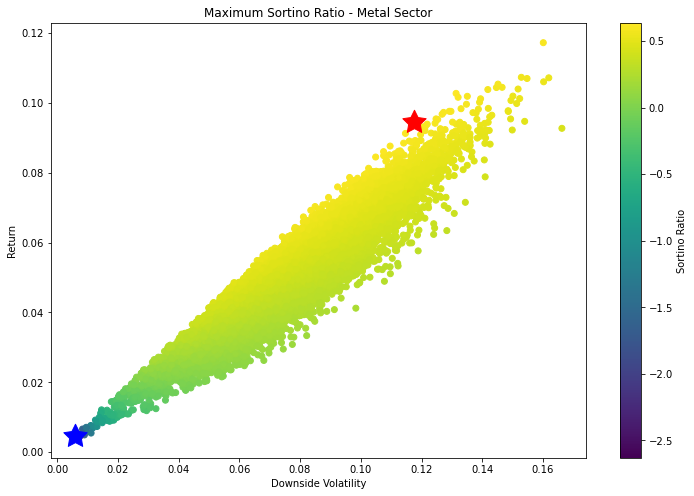

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - Metal Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.1278, 0.0056, 0.3089, 0.0523, 0.0022, 0.0095, 0.1653, 0.1202, 0.0311, 0.1772]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS'])
w_2.columns = ['weights']
w_2

[0.1278, 0.0056, 0.3089, 0.0523, 0.0022, 0.0095, 0.1653, 0.1202, 0.0311, 0.1772]


weights
TATASTEEL.NS    0.1278
HINDALCO.NS     0.0056
JSWSTEEL.NS     0.3089
ADANIENT.NS     0.0523
VEDL.NS         0.0022
COALINDIA.NS    0.0095
SAIL.NS         0.1653
JINDALSTEL.NS   0.1202
NMDC.NS         0.0311
APLAPOLLO.NS    0.1772

In [19]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0634, 0.0133, 0.1216, 0.2301, 0.0096, 0.0324, 0.0440, 0.0408, 0.1500, 0.2946]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS'])
w_1.columns = ['weights']
w_1

weights
TATASTEEL.NS    0.0634
HINDALCO.NS     0.0133
JSWSTEEL.NS     0.1216
ADANIENT.NS     0.2301
VEDL.NS         0.0096
COALINDIA.NS    0.0324
SAIL.NS         0.0440
JINDALSTEL.NS   0.0408
NMDC.NS         0.1500
APLAPOLLO.NS    0.2946

In [20]:
# Portfolio with maximum Calmar Ratio
w_raw = [0.0070, 0.0080, 0.2879, 0.0504, 0.0314, 0.2255, 0.0953, 0.1626, 0.1162, 0.0157]
w_3 = pd.DataFrame(w_raw, index = ['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS'])
w_3.columns = ['weights']
w_3

weights
TATASTEEL.NS    0.0070
HINDALCO.NS     0.0080
JSWSTEEL.NS     0.2879
ADANIENT.NS     0.0504
VEDL.NS         0.0314
COALINDIA.NS    0.2255
SAIL.NS         0.0953
JINDALSTEL.NS   0.1626
NMDC.NS         0.1162
APLAPOLLO.NS    0.0157

In [21]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
TATASTEEL.NS         0.0634         0.1278        0.0070
HINDALCO.NS          0.0133         0.0056        0.0080
JSWSTEEL.NS          0.1216         0.3089        0.2879
ADANIENT.NS          0.2301         0.0523        0.0504
VEDL.NS              0.0096         0.0022        0.0314
COALINDIA.NS         0.0324         0.0095        0.2255
SAIL.NS              0.0440         0.1653        0.0953
JINDALSTEL.NS        0.0408         0.1202        0.1626
NMDC.NS              0.1500         0.0311        0.1162
APLAPOLLO.NS         0.2946         0.1772        0.0157

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

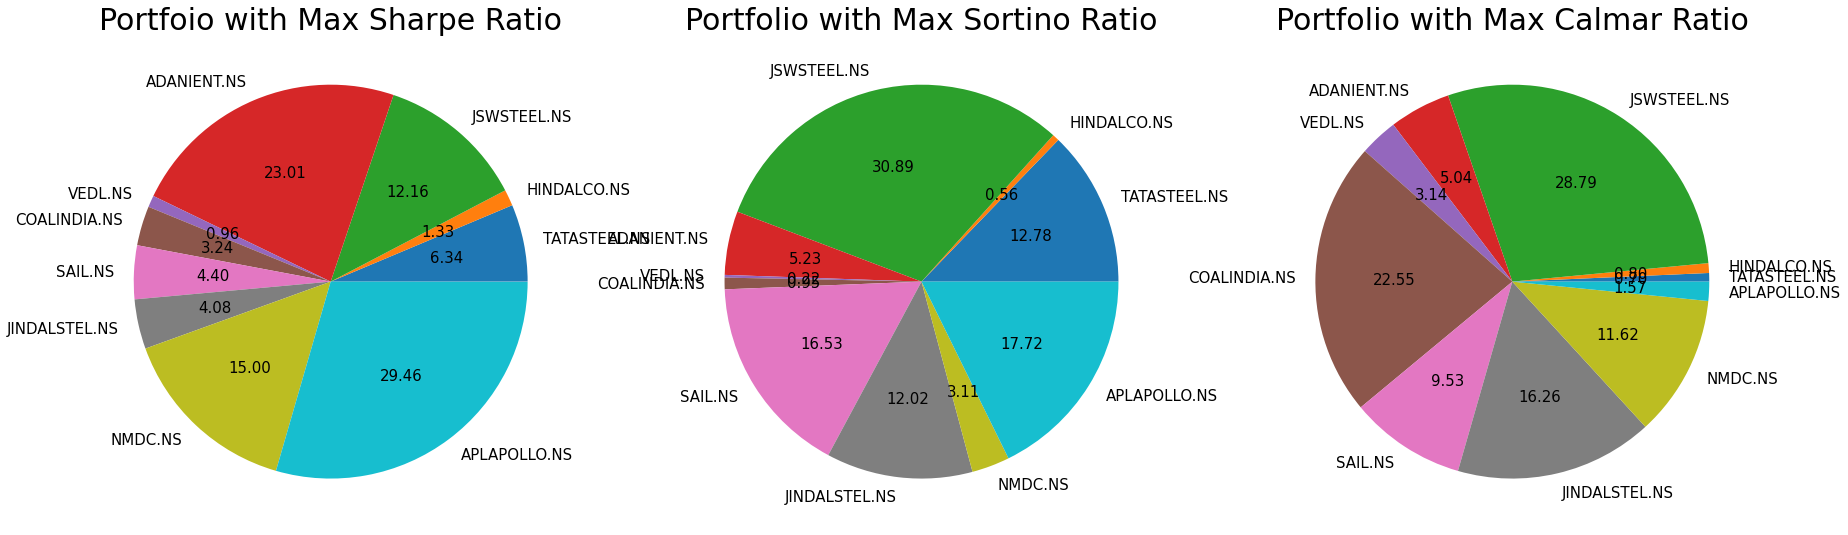

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title('Portfolio with Max Calmar Ratio', fontsize=30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [23]:
df_training.shape

(987, 10)

In [24]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [25]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.004666                     0.006070   
2017-01-04                    0.011575                     0.000344   
2017-01-05                    0.021218                     0.040646   
2017-01-06                    0.001631                    -0.001790   
2017-01-09                   -0.002040                     0.002314   
2017-01-10                    0.013439                     0.012853   
2017-01-11                    0.024829                     0.044152   
2017-01-12                    0.007780                     0.008793   
2017-01-13                    0.003446                     0.000320   
2017-01-16                    0.009197                     0.010773   
2017-01-17                   -0.001744                    -0.004324   
2017-01-18                    0.008654                     0.015619   
2017-01-19                    0.009221                     0.005122   
2017-01-20                   -0.031888                    -0.031395   
2017-01-23                    0.023716                     0.033244   
2017-01-24                    0.010691                     0.007740   
2017-01-25                   -0.001324                     0.004700   
2017-01-27                    0.034098                     0.006572   
2017-01-30                    0.004506                     0.006979   
2017-01-31                   -0.016059                    -0.004655   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.009401  
2017-01-04                    0.002145  
2017-01-05                    0.038581  
2017-01-06                   -0.005372  
2017-01-09                   -0.000858  
2017-01-10                    0.009657  
2017-01-11                    0.050502  
2017-01-12                   -0.002154  
2017-01-13                    0.000622  
2017-01-16                    0.005104  
2017-01-17                   -0.013629  
2017-01-18                    0.017781  
2017-01-19                    0.002253  
2017-01-20                   -0.028989  
2017-01-23                    0.026795  
2017-01-24                    0.012816  
2017-01-25                    0.010845  
2017-01-27                    0.004185  
2017-01-30                    0.004825  
2017-01-31                   -0.011181

<AxesSubplot:xlabel='Date', ylabel='Return'>

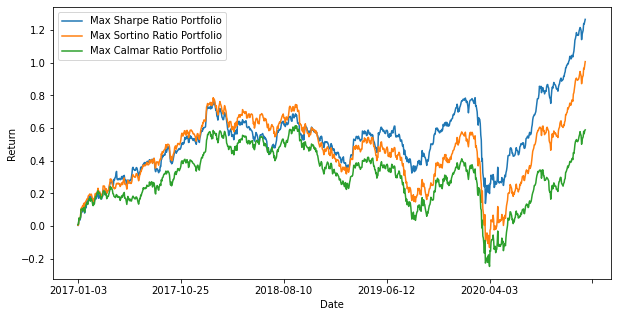

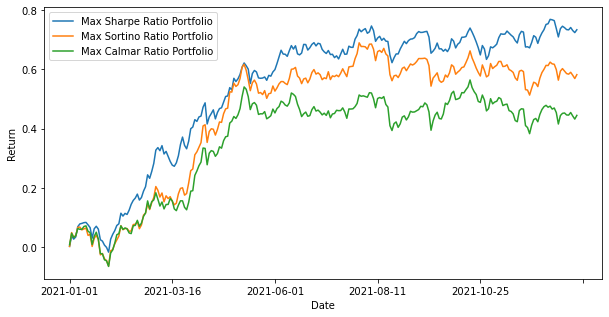

In [26]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [27]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.323007
Max Sortino Ratio Portfolio    0.257004
Max Calmar Ratio Portfolio     0.150389
dtype: float64

In [28]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.746236
Max Sortino Ratio Portfolio    0.591875
Max Calmar Ratio Portfolio     0.451893
dtype: float64